### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# К признаку стажа добавим признаки: средняя стоимость занятия,
# квалификация репетитора
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [6]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [20]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res
  

In [25]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [49]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [55]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

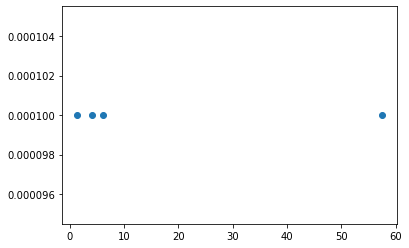

In [61]:
lambda_= [1e-4 for i in range(len(W))]
plt.scatter(W, lambda_)

### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Да, можно. Просто измерение будет лежать в промежутке от -0.5 до 0.5 из-за смещения.

### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [40]:
# L1 регуляризация - Lasso
# f(x, W) + (lambda_/2) * np.sum(np.abs(W))

In [ ]:
# df/dw1 = d(|w1|+|w2|+|w3|)/ dw1 = sign(w1)
# f'(x, W) + lambda_ * np.sign(W)

In [47]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [48]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [57.3976156   5.1079242   2.46011903  4.08691798] 39.981549269279725
1000 [57.3999499   5.76651203  1.85620907  4.03912572] 39.80712300604176
1500 [57.39995     5.99151699  1.60431305  4.06910179] 39.78234087113101
2000 [57.39995     6.07256443  1.50039558  4.09329499] 39.77848915615644
2500 [57.39995     6.10296578  1.45779797  4.10604572] 39.77786776237368
3000 [57.39995     6.11470092  1.44040178  4.11193613] 39.7777660764615
3500 [57.39995    6.1193181  1.4333132  4.1145017] 39.77774934650399
4000 [57.39995     6.12115708  1.43042856  4.11558584] 39.77774658745511
4500 [57.39995     6.12189515  1.42925561  4.11603642] 39.777746131578084
5000 [57.39995     6.12219276  1.42877888  4.11622191] 39.77774605600939


array([57.39995   ,  6.12219276,  1.42877888,  4.11622191])